In [1]:
%reset -sf

In [220]:
# LOAD THIS BEFORE START, run rmdl

#!/usr/bin/env python3
import sys
import math, random
import functools, itertools, collections, heapq, bisect
from collections import Counter, defaultdict, deque

# import numpy as np
# import scipy
import matplotlib.pyplot as plt

abc = "abcdefghijklmnopqrstuvwxyz"
abc_map = {c:i for i,c in enumerate(abc)}
M9 = 10**9 + 7  # 998244353
yes, no = "YES", "NO"
d4 = [(1,0),(0,1),(-1,0),(0,-1)]
d8 = [
    (-1,-1),(-1,0),(-1,1),
    (0,-1),(0,0),(0,1),
    (1,-1),(1,0),(1,1)]
d6 = [(2,0),(1,1),(-1,1),(-2,0),(-1,-1),(1,-1)]  # hexagonal layout
MAXINT = sys.maxsize

In [304]:
with open("/Users/htong/Downloads/input.txt") as f:
    srr, arr = f.read().split("\n\n")
srr = srr.split("\n")

In [305]:
# srr, arr = """        ...#
#         .#..
#         #...
#         ....
# ...#.......#
# ........#...
# ..#....#....
# ..........#.
#         ...#....
#         .....#..
#         .#......
#         ......#.

# 10R5L5R10L4R5L5""".split("\n\n")
# srr = srr.split("\n")

In [306]:
n = len(srr)
m = max(len(row) for row in srr)
n,m

(200, 150)

In [307]:
for i in range(n):
    while len(srr[i]) < m:
        srr[i] += " "

In [308]:
vals = []
cur = ''
for x in arr:
    if x == "R":
        vals.append(int(cur))
        cur = ''
        vals.append('R')
    elif x == "L":
        vals.append(int(cur))
        cur = ''
        vals.append('L')
    else:
        cur += x
vals.append(int(cur))

In [309]:
# You begin the path in the leftmost open tile of the top row of tiles.

In [310]:
didx = 1
# R is minus one

In [311]:
pts = []
x, y = 0,50
for val in vals:
#     print(val)
    if val == "R":
        didx = (didx - 1)%4
        continue
    if val == "L":
        didx = (didx + 1)%4
        continue
    while val > 0:
        dx, dy = d4[didx]
        odidx = didx
        xx = (x+dx)
        yy = (y+dy)
        last = -1
        flag = False
        if srr[xx%n][yy%m] == " ":
            flag = True
            if 0 <= xx < 50 and yy == 49:
                last = 11
                dist = xx-0
                didx = 1
                xx = 150 - 1 - dist
                yy = 0
            elif 50 <= xx < 100 and yy == 49:
                last = 13
                dist = xx-50
                didx = 0
                xx = 100
                yy = 0 + dist
            elif 100 <= xx < 150 and yy == -1:
                last = 12
                dist = xx-100
                didx = 1
                xx = 50 - 1 - dist
                yy = 50
            elif 150 <= xx < 200 and yy == -1:
                last = 14
                dist = xx-150
                didx = 0
                xx = 0
                yy = 50 + dist
            elif 0 <= xx < 50 and yy == 150:
                last = 15
                dist = xx-0  
                didx = 3
                xx = 150 - 1 - dist
                yy = 100 - 1
            elif 50 <= xx < 100 and yy == 100:
                last = 16
                dist = xx-50
                didx = 2
                xx = 50 - 1
                yy = 100 + dist
            elif 100 <= xx < 150 and yy == 100:
                last = 17
                dist = xx-100
                didx = 3
                xx = 50 - 1 - dist
                yy = 150 - 1
            elif 150 <= xx < 200 and yy == 50:
                last = 18
                dist = xx-150
                didx = 2
                xx = 150 - 1
                yy = 50 + dist
            elif xx == -1 and 50 <= yy < 100:
                last = 19
                dist = yy-50
                didx = 1
                xx = 150 + dist
                yy = 0
            elif xx == -1 and 100 <= yy < 150:
                last = 21
                dist = yy-100
                didx = 2
                xx = 200 - 1
                yy = 0 + dist
            elif xx == 50 and 100 <= yy < 150:
                last = 22
                dist = yy-100
                didx = 3
                xx = 50 + dist
                yy = 100 - 1
            elif xx == 100 - 1 and 0 <= yy < 50:
                last = 23
                dist = yy-0
                didx = 1
                xx = 50 + dist
                yy = 50
            elif xx == 150 and 50 <= yy < 100:
                last = 24
                dist = yy-50
                didx = 3
                xx = 150 + dist
                yy = 50 - 1
            elif xx == 200 and 0 <= yy < 50:
                last = 25
                dist = yy-0
                didx = 0
                xx = 0
                yy = 100 + dist
        if flag:
#             pts.append([(149-y,199-x),(149-yy,199-xx)])
            pts.append([(x,y),(xx,yy)])
        if srr[xx][yy] == " ":
            print(x,y,didx,last,xx,yy)
            raise
        if srr[xx][yy] == "#":
            val = 0
            didx = odidx
            continue
        if srr[xx][yy] == ".":
            x,y = xx,yy
            val -= 1
            continue
#     print(x+1,y+1)

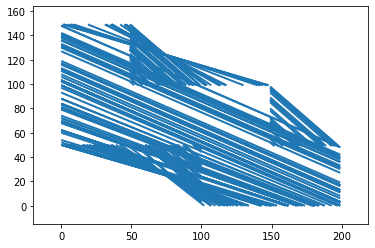

In [312]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = pts
# c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [313]:
# vals

In [314]:
# 10R5L5R10L4R5L5

In [315]:
res = x+1,y+1,didx
res

(52, 77, 2)

In [316]:
30602

30602

In [319]:
res[0] * 1000 + 4 * res[1] + 3

52311

In [162]:
181 * 1000 + 4 * 32 + 0

181128

In [ ]:
# Facing is 0 for right (>), 1 for down (v), 2 for left (<), and 3 for up (^). 
# The final password is the sum of 1000 times the row, 4 times the column, and the facing.